This guide comes directly from the [10 Minute Guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) on the Pandas official website. I ported it into this kernel to make the code more accessible. This guide is geared towards beginners who haven't used Pandas before. It has great examples on how powerful Pandas can be. Enjoy!

### This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
See the [Data Structure Intro section](Data Structure Intro section). Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20141101', periods=6)
dates

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=['one','two','three','four'])
df

,one,two,three,four
2014-11-01,-2.081019,-0.856517,0.612401,-1.674747
2014-11-02,-0.845278,1.983306,0.191953,0.134488
2014-11-03,-0.605314,-0.636184,0.707862,0.494240
2014-11-04,0.622217,2.828172,-0.222672,-0.170318
2014-11-05,-0.030346,0.817101,-2.492516,1.756475
2014-11-06,0.957112,0.148611,-0.795108,-0.906335


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes):

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# Viewing Data
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)
See the top & bottom rows of the frame

In [7]:
df.head()

,one,two,three,four
2014-11-01,-2.081019,-0.856517,0.612401,-1.674747
2014-11-02,-0.845278,1.983306,0.191953,0.134488
2014-11-03,-0.605314,-0.636184,0.707862,0.494240
2014-11-04,0.622217,2.828172,-0.222672,-0.170318
2014-11-05,-0.030346,0.817101,-2.492516,1.756475


In [8]:
df.tail(3)

,one,two,three,four
2014-11-04,0.622217,2.828172,-0.222672,-0.170318
2014-11-05,-0.030346,0.817101,-2.492516,1.756475
2014-11-06,0.957112,0.148611,-0.795108,-0.906335


Display the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['one', 'two', 'three', 'four'], dtype='object')

In [11]:
df.values

array([[-2.08101876, -0.85651746,  0.61240146, -1.67474707],
       [-0.84527813,  1.98330603,  0.1919533 ,  0.13448792],
       [-0.60531364, -0.63618384,  0.7078619 ,  0.49423983],
       [ 0.62221713,  2.82817154, -0.22267165, -0.17031828],
       [-0.03034599,  0.8171015 , -2.49251603,  1.75647502],
       [ 0.95711216,  0.14861098, -0.79510819, -0.90633501]])

Describe shows a quick statistic summary of your data

In [12]:
df.describe()

,one,two,three,four
count,6.000000,6.000000,6.000000,6.000000
mean,-0.330438,0.714081,-0.333013,-0.061033
std,1.100958,1.462920,1.195155,1.181562
min,-2.081019,-0.856517,-2.492516,-1.674747
25%,-0.785287,-0.439985,-0.651999,-0.722331
50%,-0.317830,0.482856,-0.015359,-0.017915
75%,0.459076,1.691755,0.507289,0.404302
max,0.957112,2.828172,0.707862,1.756475


Transposing your data

In [13]:
df.T

,2014-11-01 00:00:00,2014-11-02 00:00:00,2014-11-03 00:00:00,2014-11-04 00:00:00,2014-11-05 00:00:00,2014-11-06 00:00:00
one,-2.081019,-0.845278,-0.605314,0.622217,-0.030346,0.957112
two,-0.856517,1.983306,-0.636184,2.828172,0.817101,0.148611
three,0.612401,0.191953,0.707862,-0.222672,-2.492516,-0.795108
four,-1.674747,0.134488,0.494240,-0.170318,1.756475,-0.906335


Sorting by an axis (In this case, sorting the columns in reverse alphabetical order):

In [14]:
df.sort_index(axis=1, ascending=False)

,two,three,one,four
2014-11-01,-0.856517,0.612401,-2.081019,-1.674747
2014-11-02,1.983306,0.191953,-0.845278,0.134488
2014-11-03,-0.636184,0.707862,-0.605314,0.494240
2014-11-04,2.828172,-0.222672,0.622217,-0.170318
2014-11-05,0.817101,-2.492516,-0.030346,1.756475
2014-11-06,0.148611,-0.795108,0.957112,-0.906335


Sorting by values

In [15]:
df.sort_values(by='two')

,one,two,three,four
2014-11-01,-2.081019,-0.856517,0.612401,-1.674747
2014-11-03,-0.605314,-0.636184,0.707862,0.494240
2014-11-06,0.957112,0.148611,-0.795108,-0.906335
2014-11-05,-0.030346,0.817101,-2.492516,1.756475
2014-11-02,-0.845278,1.983306,0.191953,0.134488
2014-11-04,0.622217,2.828172,-0.222672,-0.170318


# Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## Getting

Selecting a single column, which yields a Series, equivalent to df.one

In [16]:
df['one']

2014-11-01   -2.081019
2014-11-02   -0.845278
2014-11-03   -0.605314
2014-11-04    0.622217
2014-11-05   -0.030346
2014-11-06    0.957112
Freq: D, Name: one, dtype: float64

In [17]:
df.one

2014-11-01   -2.081019
2014-11-02   -0.845278
2014-11-03   -0.605314
2014-11-04    0.622217
2014-11-05   -0.030346
2014-11-06    0.957112
Freq: D, Name: one, dtype: float64

Selecting via [], which slices the rows.

In [18]:
df[0:3]

,one,two,three,four
2014-11-01,-2.081019,-0.856517,0.612401,-1.674747
2014-11-02,-0.845278,1.983306,0.191953,0.134488
2014-11-03,-0.605314,-0.636184,0.707862,0.494240


In [19]:
df['20141102':'20141104']

,one,two,three,four
2014-11-02,-0.845278,1.983306,0.191953,0.134488
2014-11-03,-0.605314,-0.636184,0.707862,0.494240
2014-11-04,0.622217,2.828172,-0.222672,-0.170318


## Selecting by Label

See more in[ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [20]:
df.loc[dates[0]]

one     -2.081019
two     -0.856517
three    0.612401
four    -1.674747
Name: 2014-11-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [21]:
df.loc[:,['one','two']]

,one,two
2014-11-01,-2.081019,-0.856517
2014-11-02,-0.845278,1.983306
2014-11-03,-0.605314,-0.636184
2014-11-04,0.622217,2.828172
2014-11-05,-0.030346,0.817101
2014-11-06,0.957112,0.148611


Showing label slicing, both endpoints are included

In [22]:
df.loc['20141102':'20141104',['one','two']]

,one,two
2014-11-02,-0.845278,1.983306
2014-11-03,-0.605314,-0.636184
2014-11-04,0.622217,2.828172


Reduction in the dimensions of the returned object

In [23]:
df.loc['20141102',['one','two']]

one   -0.845278
two    1.983306
Name: 2014-11-02 00:00:00, dtype: float64

For getting a scalar value

In [24]:
df.loc[dates[0],'one']

-2.081018759354865

For getting fast access to a scalar (equiv to the prior method)

In [25]:
df.at[dates[0],'one']

-2.081018759354865

## Selection by Position

See more in [Selection by Position](Selection by Position)

Select via the position of the passed integers

In [26]:
df.iloc[3]

one      0.622217
two      2.828172
three   -0.222672
four    -0.170318
Name: 2014-11-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

By lists of integer position locations, similar to the numpy/python style

In [27]:
df.iloc[[1,2,4],[0,2]]

,one,three
2014-11-02,-0.845278,0.191953
2014-11-03,-0.605314,0.707862
2014-11-05,-0.030346,-2.492516


For slicing rows explicitly

In [28]:
df.iloc[1:3,:]

,one,two,three,four
2014-11-02,-0.845278,1.983306,0.191953,0.134488
2014-11-03,-0.605314,-0.636184,0.707862,0.494240


For slicing columns explicitly

In [29]:
df.iloc[:,1:3]

,two,three
2014-11-01,-0.856517,0.612401
2014-11-02,1.983306,0.191953
2014-11-03,-0.636184,0.707862
2014-11-04,2.828172,-0.222672
2014-11-05,0.817101,-2.492516
2014-11-06,0.148611,-0.795108


For getting a value explicitly

In [30]:
df.iloc[1,1]

1.9833060275110046

For getting fast access to a scalar (equiv to the prior method)

In [31]:
df.iat[0,0]

-2.081018759354865

## Boolean Indexing
Using a single column’s values to select data.

In [32]:
df[df.one > 0.5]

,one,two,three,four
2014-11-04,0.622217,2.828172,-0.222672,-0.170318
2014-11-06,0.957112,0.148611,-0.795108,-0.906335


Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df>0]

,one,two,three,four
2014-11-01,NaN,NaN,0.612401,NaN
2014-11-02,NaN,1.983306,0.191953,0.134488
2014-11-03,NaN,NaN,0.707862,0.494240
2014-11-04,0.622217,2.828172,NaN,NaN
2014-11-05,NaN,0.817101,NaN,1.756475
2014-11-06,0.957112,0.148611,NaN,NaN


Using the isin method for filtering:

In [34]:
df2 = df.copy()
df2['five'] = ['one', 'one','two','three','four','three']
df2

,one,two,three,four,five
2014-11-01,-2.081019,-0.856517,0.612401,-1.674747,one
2014-11-02,-0.845278,1.983306,0.191953,0.134488,one
2014-11-03,-0.605314,-0.636184,0.707862,0.494240,two
2014-11-04,0.622217,2.828172,-0.222672,-0.170318,three
2014-11-05,-0.030346,0.817101,-2.492516,1.756475,four
2014-11-06,0.957112,0.148611,-0.795108,-0.906335,three


In [35]:
df2[df2['five'].isin(['two','four'])]

,one,two,three,four,five
2014-11-03,-0.605314,-0.636184,0.707862,0.494240,two
2014-11-05,-0.030346,0.817101,-2.492516,1.756475,four


## Setting
Setting a new column automatically aligns the data by the indexes

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20141101', periods=6))
s1

2014-11-01    1
2014-11-02    2
2014-11-03    3
2014-11-04    4
2014-11-05    5
2014-11-06    6
Freq: D, dtype: int64

In [37]:
df['six'] = s1
df

,one,two,three,four,six
2014-11-01,-2.081019,-0.856517,0.612401,-1.674747,1
2014-11-02,-0.845278,1.983306,0.191953,0.134488,2
2014-11-03,-0.605314,-0.636184,0.707862,0.494240,3
2014-11-04,0.622217,2.828172,-0.222672,-0.170318,4
2014-11-05,-0.030346,0.817101,-2.492516,1.756475,5
2014-11-06,0.957112,0.148611,-0.795108,-0.906335,6


Setting values by label:

In [38]:
df.at[dates[0],'one'] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,-0.856517,0.612401,-1.674747,1
2014-11-02,-0.845278,1.983306,0.191953,0.134488,2
2014-11-03,-0.605314,-0.636184,0.707862,0.494240,3
2014-11-04,0.622217,2.828172,-0.222672,-0.170318,4
2014-11-05,-0.030346,0.817101,-2.492516,1.756475,5
2014-11-06,0.957112,0.148611,-0.795108,-0.906335,6


Setting values by position:

In [39]:
df.iat[0,1] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.612401,-1.674747,1
2014-11-02,-0.845278,1.983306,0.191953,0.134488,2
2014-11-03,-0.605314,-0.636184,0.707862,0.494240,3
2014-11-04,0.622217,2.828172,-0.222672,-0.170318,4
2014-11-05,-0.030346,0.817101,-2.492516,1.756475,5
2014-11-06,0.957112,0.148611,-0.795108,-0.906335,6


In [40]:
df.loc[:,'four'] = np.array([5] * len(df))
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.612401,5,1
2014-11-02,-0.845278,1.983306,0.191953,5,2
2014-11-03,-0.605314,-0.636184,0.707862,5,3
2014-11-04,0.622217,2.828172,-0.222672,5,4
2014-11-05,-0.030346,0.817101,-2.492516,5,5
2014-11-06,0.957112,0.148611,-0.795108,5,6


A where operation with setting.

In [41]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,one,two,three,four,six
2014-11-01,0.000000,0.000000,-0.612401,-5,-1
2014-11-02,-0.845278,-1.983306,-0.191953,-5,-2
2014-11-03,-0.605314,-0.636184,-0.707862,-5,-3
2014-11-04,-0.622217,-2.828172,-0.222672,-5,-4
2014-11-05,-0.030346,-0.817101,-2.492516,-5,-5
2014-11-06,-0.957112,-0.148611,-0.795108,-5,-6


## Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.612401,5,1,1.0
2014-11-02,-0.845278,1.983306,0.191953,5,2,1.0
2014-11-03,-0.605314,-0.636184,0.707862,5,3,NaN
2014-11-04,0.622217,2.828172,-0.222672,5,4,NaN


To drop any rows that have missing data:

In [43]:
df1.dropna(how='any')

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.612401,5,1,1.0
2014-11-02,-0.845278,1.983306,0.191953,5,2,1.0


Filling missing data:

In [44]:
df1.fillna(value=5)

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.612401,5,1,1.0
2014-11-02,-0.845278,1.983306,0.191953,5,2,1.0
2014-11-03,-0.605314,-0.636184,0.707862,5,3,5.0
2014-11-04,0.622217,2.828172,-0.222672,5,4,5.0


## Operations
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [45]:
df.mean()

one      0.016399
two      0.856834
three   -0.333013
four     5.000000
six      3.500000
dtype: float64

Same operation on the other axis:

In [46]:
df.mean(1)

2014-11-01    1.322480
2014-11-02    1.665996
2014-11-03    1.493273
2014-11-04    2.445543
2014-11-05    1.658848
2014-11-06    2.262123
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension. The following code also shifts the data vertically, leaving NaN values in the unoccupied spaces

In [47]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2014-11-01    NaN
2014-11-02    NaN
2014-11-03    1.0
2014-11-04    3.0
2014-11-05    5.0
2014-11-06    NaN
Freq: D, dtype: float64

In [48]:
df.sub(s, axis='index')

,one,two,three,four,six
2014-11-01,NaN,NaN,NaN,NaN,NaN
2014-11-02,NaN,NaN,NaN,NaN,NaN
2014-11-03,-1.605314,-1.636184,-0.292138,4.0,2.0
2014-11-04,-2.377783,-0.171828,-3.222672,2.0,1.0
2014-11-05,-5.030346,-4.182899,-7.492516,0.0,0.0
2014-11-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data

In [49]:
df.apply(np.cumsum)

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.612401,5,1
2014-11-02,-0.845278,1.983306,0.804355,10,3
2014-11-03,-1.450592,1.347122,1.512217,15,6
2014-11-04,-0.828375,4.175294,1.289545,20,10
2014-11-05,-0.858721,4.992395,-1.202971,25,15
2014-11-06,0.098392,5.141006,-1.998079,30,21


### Histogramming 
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [50]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    3
2    4
3    1
4    5
5    1
6    6
7    3
8    5
9    5
dtype: int64

In [51]:
s.value_counts()

5    3
3    2
1    2
6    1
4    1
0    1
dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [52]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [53]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat):

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.436112,0.302169,0.067651,0.967016
1,-0.077582,0.491488,0.325616,-1.142436
2,1.431596,0.137711,0.139401,0.928530
3,-0.595253,0.152700,0.332961,0.827073
4,0.705462,-1.262584,-0.177256,1.388932
5,-1.004146,0.399645,-0.439888,0.625605
6,0.017679,0.493244,0.364786,0.333770
7,0.665226,-0.487820,0.125152,0.743315
8,0.544550,0.456231,-0.972469,-0.176727
9,-0.799549,0.198477,1.500031,-0.340852


In [55]:
#break it into pieces:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.436112  0.302169  0.067651  0.967016
 1 -0.077582  0.491488  0.325616 -1.142436
 2  1.431596  0.137711  0.139401  0.928530,
           0         1         2         3
 3 -0.595253  0.152700  0.332961  0.827073
 4  0.705462 -1.262584 -0.177256  1.388932
 5 -1.004146  0.399645 -0.439888  0.625605
 6  0.017679  0.493244  0.364786  0.333770,
           0         1         2         3
 7  0.665226 -0.487820  0.125152  0.743315
 8  0.544550  0.456231 -0.972469 -0.176727
 9 -0.799549  0.198477  1.500031 -0.340852]

In [56]:
pd.concat(pieces)


,0,1,2,3
0,-0.436112,0.302169,0.067651,0.967016
1,-0.077582,0.491488,0.325616,-1.142436
2,1.431596,0.137711,0.139401,0.928530
3,-0.595253,0.152700,0.332961,0.827073
4,0.705462,-1.262584,-0.177256,1.388932
5,-1.004146,0.399645,-0.439888,0.625605
6,0.017679,0.493244,0.364786,0.333770
7,0.665226,-0.487820,0.125152,0.743315
8,0.544550,0.456231,-0.972469,-0.176727
9,-0.799549,0.198477,1.500031,-0.340852


### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [57]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [58]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [59]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [61]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [62]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append
Append rows to a dataframe. See the [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [63]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.456646,1.421271,0.977136,-1.999726
1,-0.223248,1.143462,0.078680,0.304016
2,-1.283058,-0.533155,0.112845,1.722456
3,0.003237,1.082237,0.676849,-0.141792
4,-2.226915,1.328215,0.253559,-1.376209
5,0.858082,-1.005122,-0.922258,0.541143
6,0.568793,0.402721,-0.347052,0.672379
7,1.118566,-0.045804,0.023041,0.221892


In [64]:
s = df.iloc[3]
s

A    0.003237
B    1.082237
C    0.676849
D   -0.141792
Name: 3, dtype: float64

In [65]:
df.append(s,ignore_index=True)

,A,B,C,D
0,0.456646,1.421271,0.977136,-1.999726
1,-0.223248,1.143462,0.078680,0.304016
2,-1.283058,-0.533155,0.112845,1.722456
3,0.003237,1.082237,0.676849,-0.141792
4,-2.226915,1.328215,0.253559,-1.376209
5,0.858082,-1.005122,-0.922258,0.541143
6,0.568793,0.402721,-0.347052,0.672379
7,1.118566,-0.045804,0.023041,0.221892
8,0.003237,1.082237,0.676849,-0.141792


# Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.671250,-0.331143
1,bar,one,-0.495065,1.478643
2,foo,two,1.439880,0.703543
3,bar,three,-0.481897,-0.126245
4,foo,two,1.507422,0.078659
5,bar,two,0.894381,1.346379
6,foo,one,0.741226,0.988908
7,foo,three,-0.010205,-0.642624


Grouping and then applying a function sum to the resulting groups.

In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.082580,2.698776
foo,3.007072,0.797343


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [68]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.495065  1.478643
    three -0.481897 -0.126245
    two    0.894381  1.346379
foo one    0.069976  0.657765
    three -0.010205 -0.642624
    two    2.947301  0.782203

# Reshaping
See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [70]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [71]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.427081 -0.448652
      two     1.348324  0.224204
baz   one     0.961195 -0.171636
      two    -1.261235 -1.143567
foo   one    -0.422736 -0.042326
      two     0.050748 -2.078037
qux   one     0.465950  0.799862
      two     0.476400 -0.280527

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [72]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.427081
               B   -0.448652
       two     A    1.348324
               B    0.224204
baz    one     A    0.961195
               B   -0.171636
       two     A   -1.261235
               B   -1.143567
foo    one     A   -0.422736
               B   -0.042326
       two     A    0.050748
               B   -2.078037
qux    one     A    0.465950
               B    0.799862
       two     A    0.476400
               B   -0.280527
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [73]:
stacked.unstack()

A         B
first second                    
bar   one    -0.427081 -0.448652
      two     1.348324  0.224204
baz   one     0.961195 -0.171636
      two    -1.261235 -1.143567
foo   one    -0.422736 -0.042326
      two     0.050748 -2.078037
qux   one     0.465950  0.799862
      two     0.476400 -0.280527

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.427081  1.348324
      B -0.448652  0.224204
baz   A  0.961195 -1.261235
      B -0.171636 -1.143567
foo   A -0.422736  0.050748
      B -0.042326 -2.078037
qux   A  0.465950  0.476400
      B  0.799862 -0.280527

In [75]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.427081  0.961195 -0.422736  0.465950
       B -0.448652 -0.171636 -0.042326  0.799862
two    A  1.348324 -1.261235  0.050748  0.476400
       B  0.224204 -1.143567 -2.078037 -0.280527

### Pivot Tables
See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [76]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.713789,-0.514429
1,one,B,foo,-2.088411,1.047928
2,two,C,foo,-1.037998,1.741442
3,three,A,bar,1.656743,-0.930621
4,one,B,bar,-0.688656,-0.542723
5,one,C,bar,0.503639,1.723579
6,two,A,foo,2.235146,0.361746
7,three,B,foo,-0.177621,-1.140500
8,one,C,foo,-1.254126,0.288719
9,one,A,bar,1.028623,0.891349


We can produce pivot tables from this data very easily:

In [77]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.028623 -0.713789
      B -0.688656 -2.088411
      C  0.503639 -1.254126
three A  1.656743       NaN
      B       NaN -0.177621
      C  0.686261       NaN
two   A       NaN  2.235146
      B -2.723264       NaN
      C       NaN -1.037998

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries).

In [78]:
rng = pd.date_range('1/1/2017', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()


2017-01-01    24600
Freq: 5T, dtype: int64

Time zone representation

In [79]:
rng = pd.date_range('3/6/2017 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2017-03-06   -1.062920
2017-03-07   -0.108798
2017-03-08   -0.894970
2017-03-09    0.486812
2017-03-10    0.567902
Freq: D, dtype: float64

In [80]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2017-03-06 00:00:00+00:00   -1.062920
2017-03-07 00:00:00+00:00   -0.108798
2017-03-08 00:00:00+00:00   -0.894970
2017-03-09 00:00:00+00:00    0.486812
2017-03-10 00:00:00+00:00    0.567902
Freq: D, dtype: float64

Convert to another time zone

In [81]:
ts_utc.tz_convert('US/Eastern')

2017-03-05 19:00:00-05:00   -1.062920
2017-03-06 19:00:00-05:00   -0.108798
2017-03-07 19:00:00-05:00   -0.894970
2017-03-08 19:00:00-05:00    0.486812
2017-03-09 19:00:00-05:00    0.567902
Freq: D, dtype: float64

Converting between time span representations

In [82]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.381079
2012-02-29    0.732092
2012-03-31   -0.378388
2012-04-30   -0.117352
2012-05-31   -1.046533
Freq: M, dtype: float64

In [83]:
ps = ts.to_period('M')
ps

2012-01   -1.381079
2012-02    0.732092
2012-03   -0.378388
2012-04   -0.117352
2012-05   -1.046533
Freq: M, dtype: float64

In [84]:
ps.to_timestamp()

2012-01-01   -1.381079
2012-02-01    0.732092
2012-03-01   -0.378388
2012-04-01   -0.117352
2012-05-01   -1.046533
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [85]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.756576
1990-06-01 09:00   -0.176688
1990-09-01 09:00    0.104222
1990-12-01 09:00   -0.391258
1991-03-01 09:00   -0.831849
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [86]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type:

In [87]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [88]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [89]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [90]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [91]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs

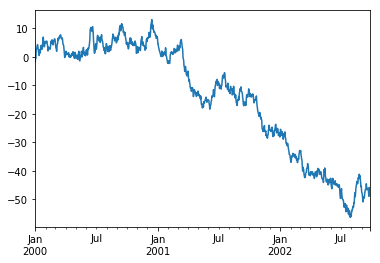

In [92]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

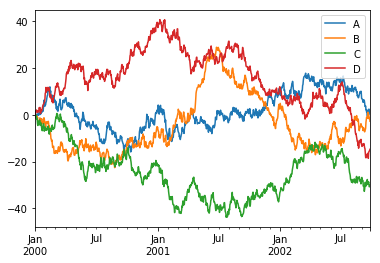

In [93]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv).

In [94]:
df.to_csv('foo.csv')

In [95]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.165439,-1.241892,-0.342680,0.106041
1,2000-01-02,-1.298616,-1.023435,-0.944371,0.586668
2,2000-01-03,-0.714936,-1.392907,-0.323638,1.589524
3,2000-01-04,0.202948,-0.704013,-0.162558,1.615731
4,2000-01-05,-1.143432,-0.318759,-1.912439,2.029570
5,2000-01-06,-0.641053,-0.928672,-1.370465,1.346422
6,2000-01-07,0.133213,-1.686737,-2.174208,1.097845
7,2000-01-08,0.281839,-1.026250,-3.980469,1.487319
8,2000-01-09,0.221473,-2.580209,-4.595592,1.661385
9,2000-01-10,-0.146512,-3.149283,-3.549284,1.125317


### HDF5
Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5).

Writing to a HDF5 Store:

In [96]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store:

In [97]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.165439,-1.241892,-0.342680,0.106041
2000-01-02,-1.298616,-1.023435,-0.944371,0.586668
2000-01-03,-0.714936,-1.392907,-0.323638,1.589524
2000-01-04,0.202948,-0.704013,-0.162558,1.615731
2000-01-05,-1.143432,-0.318759,-1.912439,2.029570
2000-01-06,-0.641053,-0.928672,-1.370465,1.346422
2000-01-07,0.133213,-1.686737,-2.174208,1.097845
2000-01-08,0.281839,-1.026250,-3.980469,1.487319
2000-01-09,0.221473,-2.580209,-4.595592,1.661385
2000-01-10,-0.146512,-3.149283,-3.549284,1.125317


### Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel).

Writing to an excel file:

In [98]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file:

In [99]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.165439,-1.241892,-0.342680,0.106041
2000-01-02,-1.298616,-1.023435,-0.944371,0.586668
2000-01-03,-0.714936,-1.392907,-0.323638,1.589524
2000-01-04,0.202948,-0.704013,-0.162558,1.615731
2000-01-05,-1.143432,-0.318759,-1.912439,2.029570
2000-01-06,-0.641053,-0.928672,-1.370465,1.346422
2000-01-07,0.133213,-1.686737,-2.174208,1.097845
2000-01-08,0.281839,-1.026250,-3.980469,1.487319
2000-01-09,0.221473,-2.580209,-4.595592,1.661385
2000-01-10,-0.146512,-3.149283,-3.549284,1.125317


# Gotchas
If you are trying an operation and you see an exception like:

In [100]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See[ Comparisons](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.